<a href="https://www.kaggle.com/code/arnabmukherjee853/diabetes-disease-prediction?scriptVersionId=235105660" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease/diabetes.csv


## Reading the data and checking statistical parameters.

In [2]:
df=pd.read_csv('/kaggle/input/heart-disease/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**The given dataset does not contain any null values.**

In [4]:
# Checking statistical measures[Average,Standard Deviation,Quartiles] of each numerical columns.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data visualization
1. Plotting Histograms of each numerical features wrt the target variable, i.e. 'Outcome'.
2. Plotting Boxplot for observing outliers in numerical variables.
3. Generating a pair plot to investigate how features influence each other.
4. Finally a Correlation table to numerically visualize it.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

**1. Histogram**

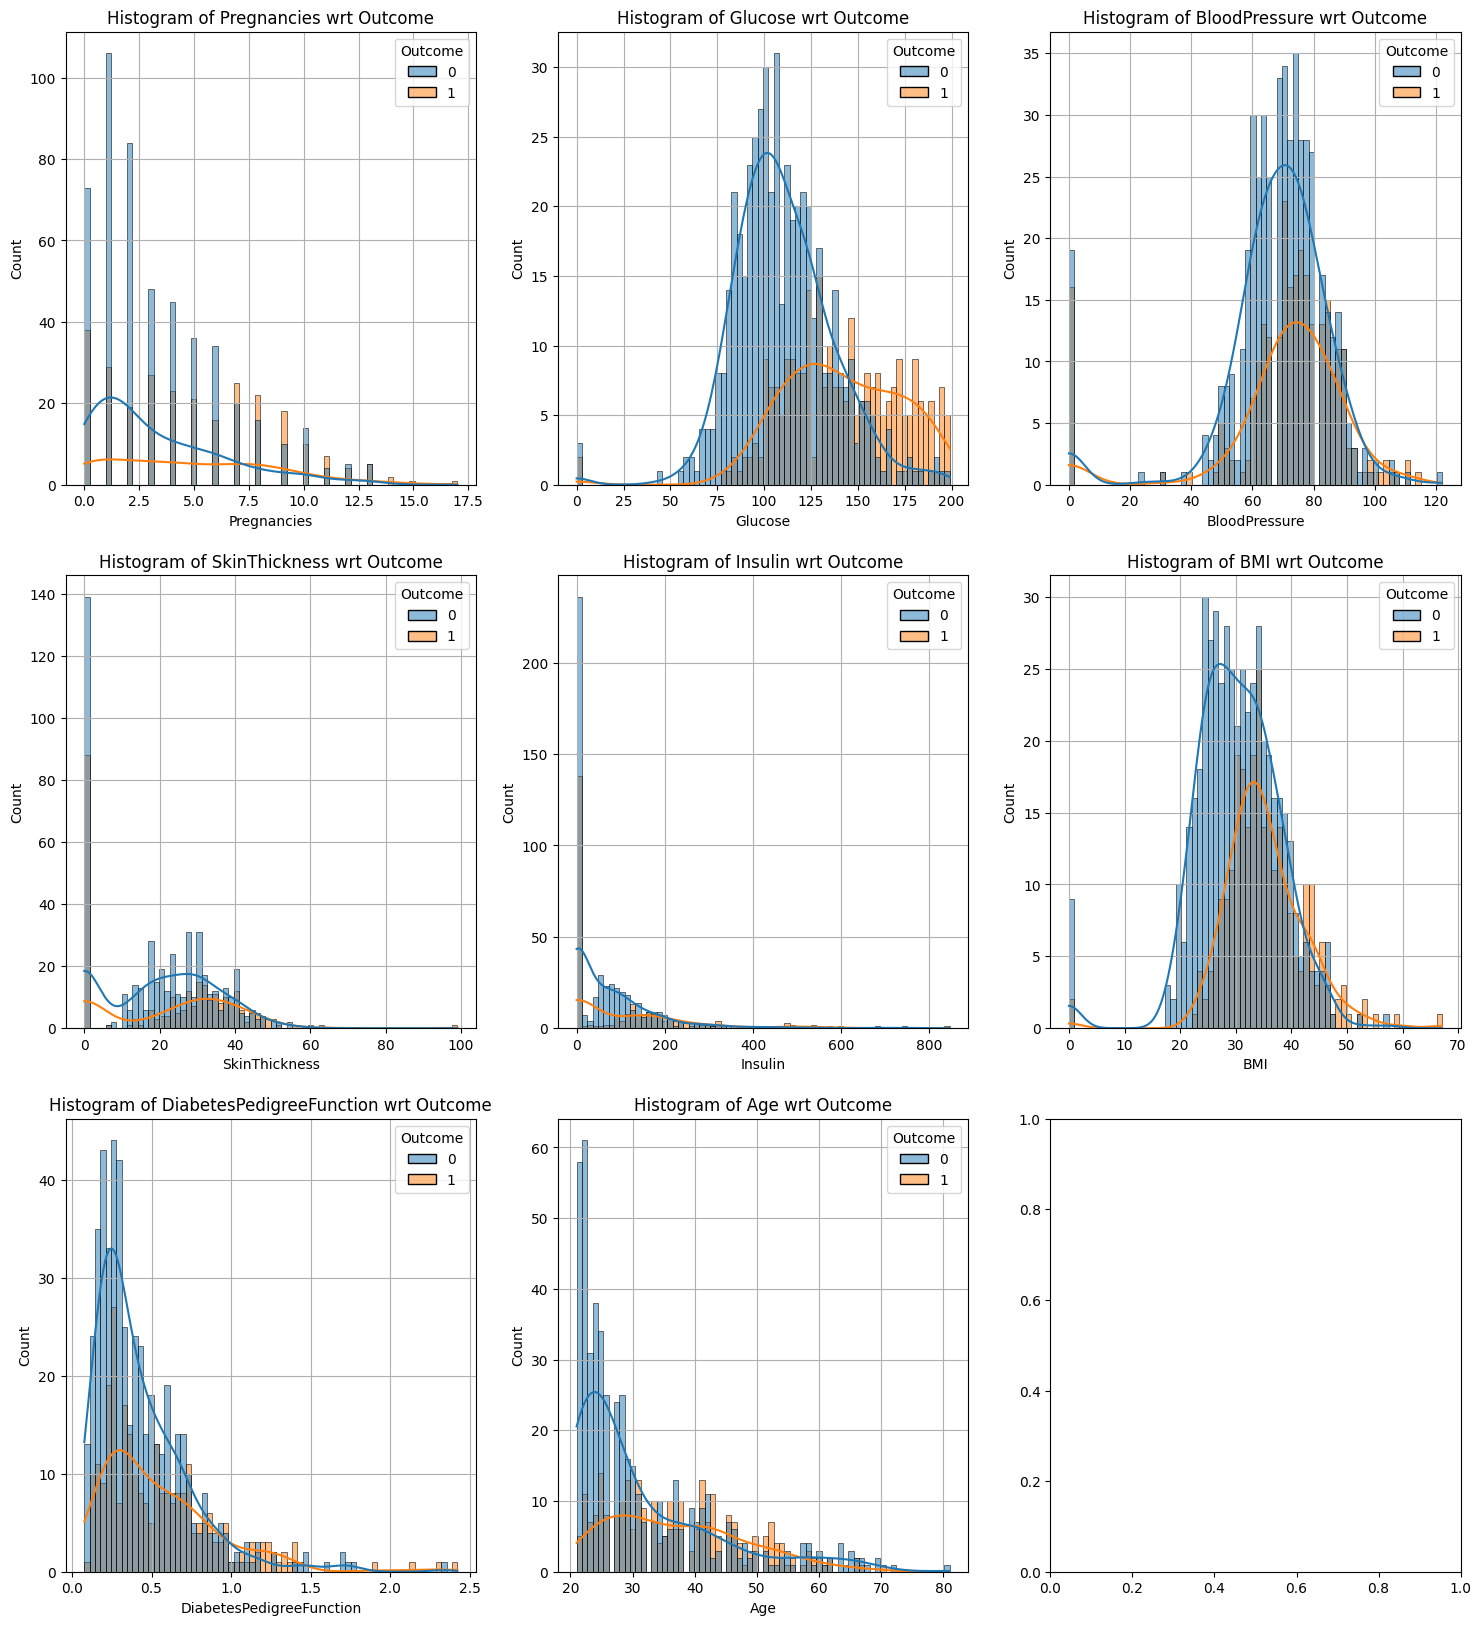

In [6]:
fig,axes=plt.subplots(3,3,figsize=(18,20))
for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.histplot(data=df,x=df[df.columns[i]],hue=df.Outcome,bins=70,ax=ax,kde=True,)
    ax.set(xlabel=df.columns[i])
    ax.set_title(f'Histogram of {df.columns[i]} wrt Outcome')
    ax.grid(True)

**2. Boxplot**

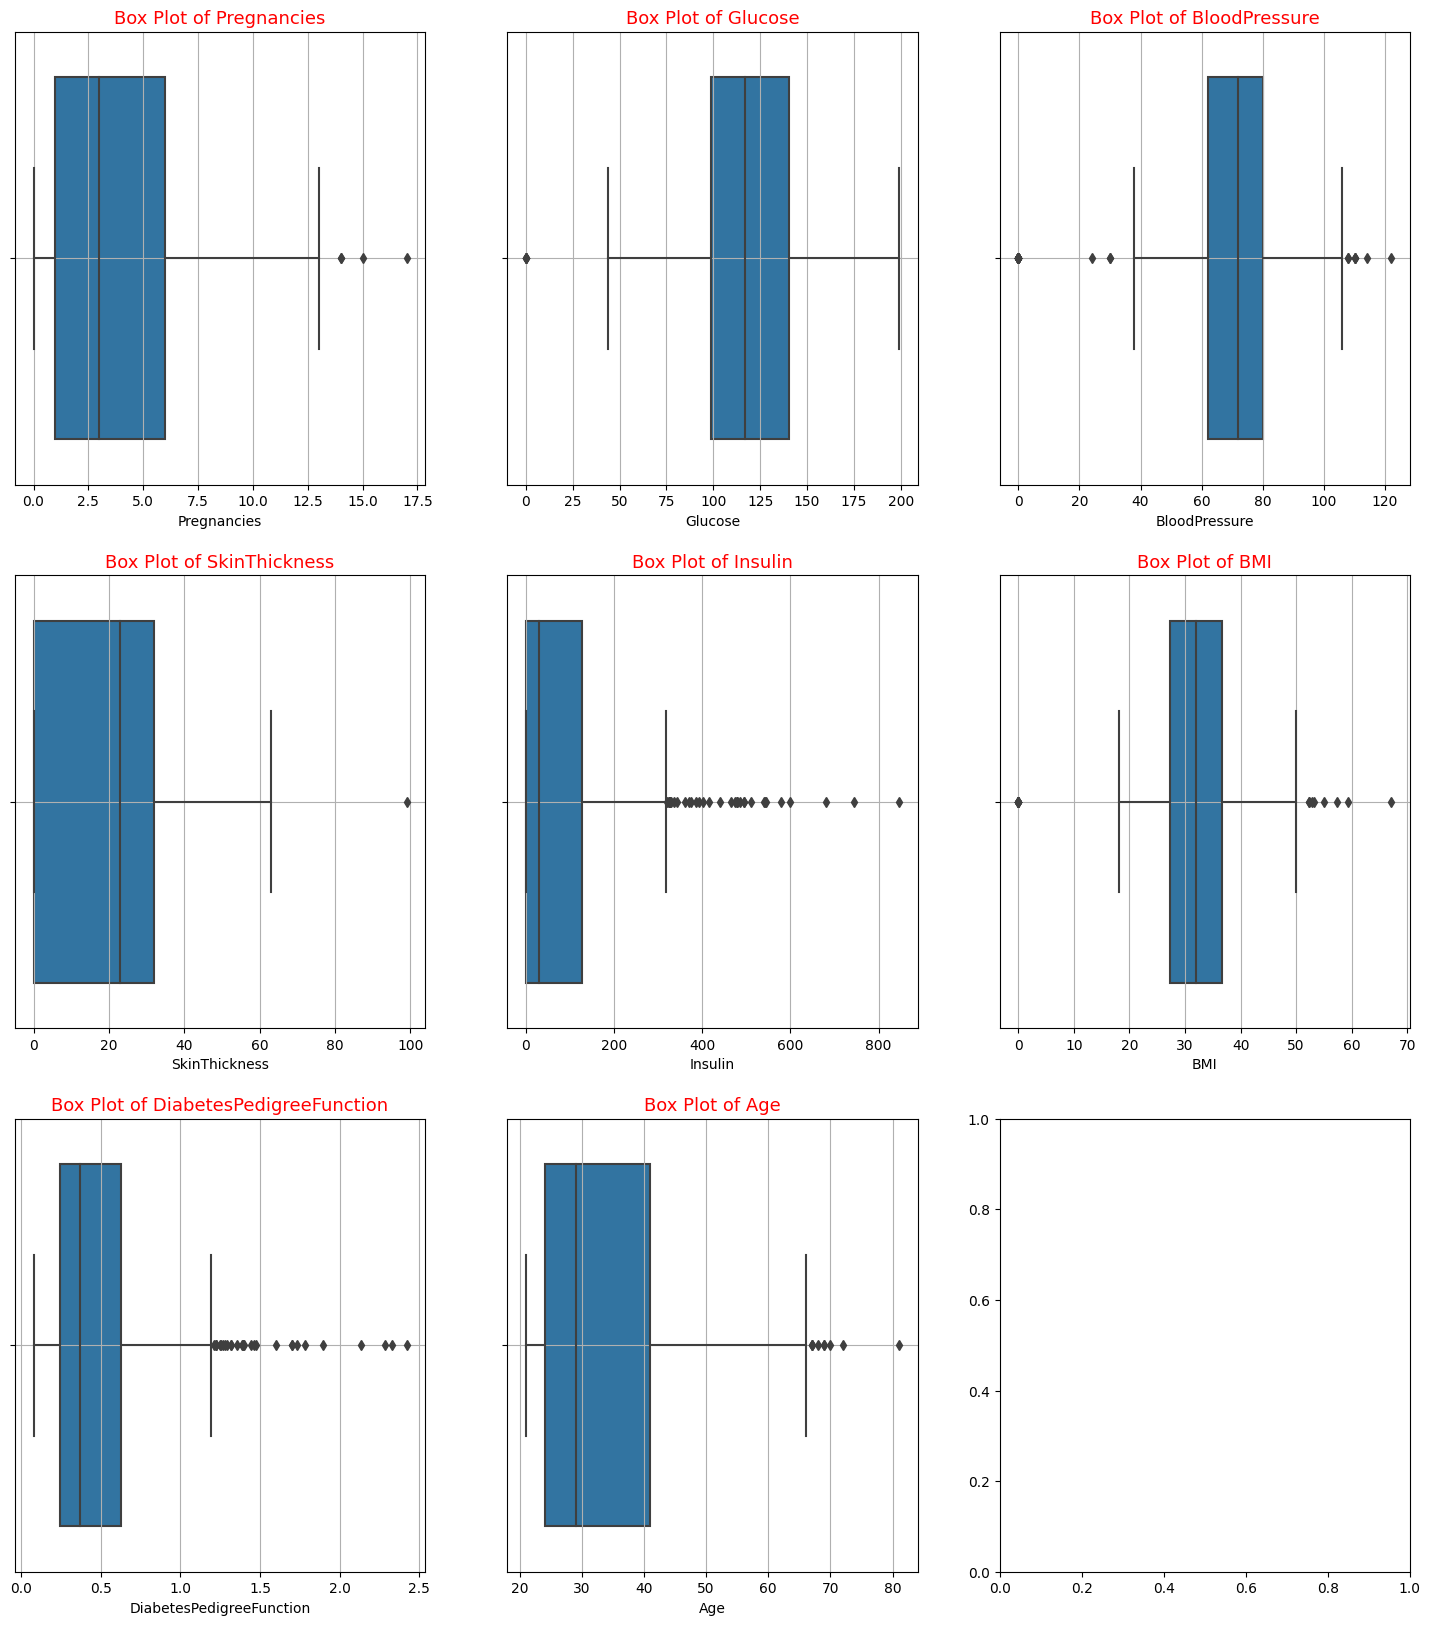

In [7]:
fig,axes=plt.subplots(3,3,figsize=(18,20))
for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.boxplot(data=df,x=df[df.columns[i]], ax=ax,)
    ax.set_title(f'Box Plot of {df.columns[i]}',color='red',fontsize=13,)
    ax.grid(True)
                                

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**3. PairPlot**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


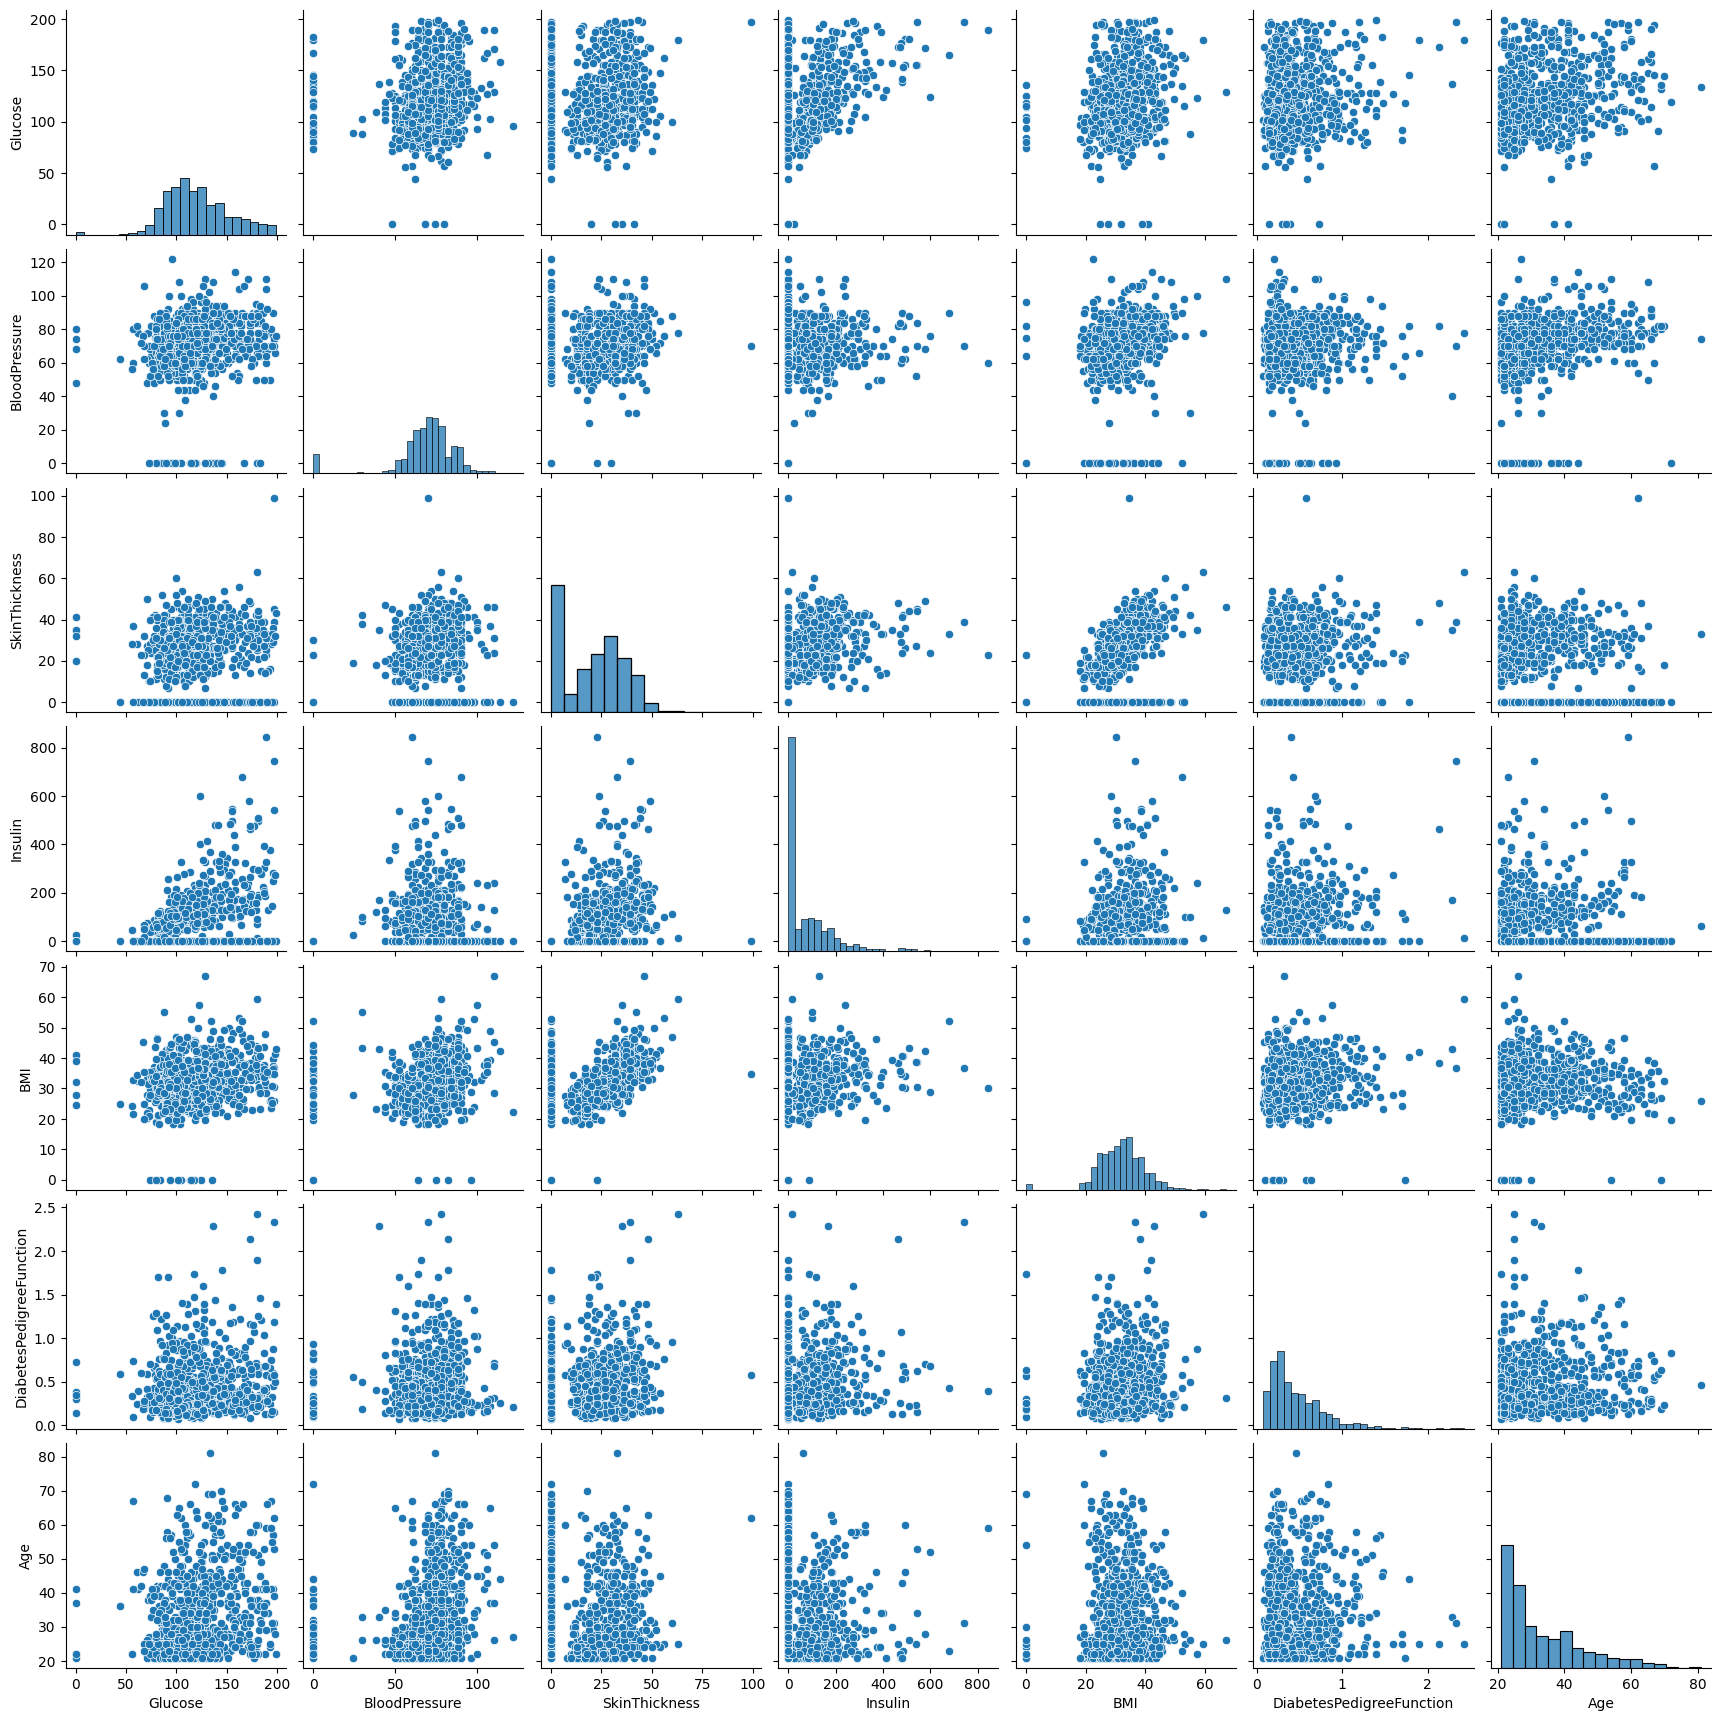

In [9]:
sns.pairplot(df.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

**4. Correlation Table**

In [10]:
Correlation=df.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].corr()
Cm=sns.light_palette('Green',as_cmap=True)
Correlation.style.background_gradient(cmap=Cm)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


## Feature importence
This analysis aims to identify which features have the most predictive power or strongest relationship with the target variable in a model.

In [11]:
X = df.loc[:,df.columns!='Outcome']
Y = df.Outcome

<Axes: >

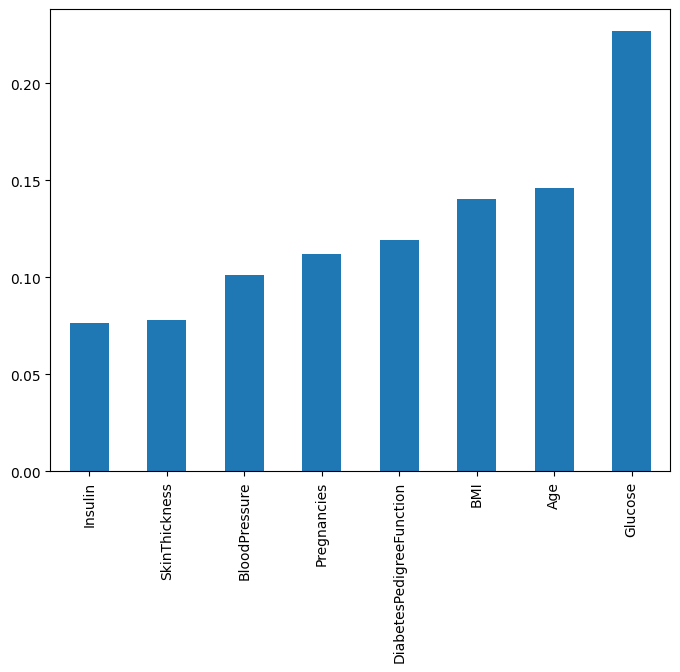

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(X,Y)
df_new=pd.Series(ETC.feature_importances_,index=X.columns)
plt.figure(figsize=(8,6))
df_new.sort_values().plot(kind='bar')

**Cleaning the most importent features[Glucose, BMI, DiabetesPedigreeFunction] using IQR analysis**

In [13]:
Q1=df['Glucose'].quantile(.25)
Q3=df['Glucose'].quantile(.75)
IQR=Q3-Q1
lower_b=Q1-1.5*IQR
upper_b=Q3+1.5*IQR
Df=df[df['Glucose'].between(lower_b,upper_b,inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
Q1=Df['BMI'].quantile(0.25)
Q3=Df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*Q3
Df=Df[Df['BMI'].between(lower,upper,inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
Q1 = Df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = Df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
Df = Df[Df['DiabetesPedigreeFunction'].between(lower,upper,inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Splitting the dataset into Dependent and Independent variable.

In [16]:
X=Df.loc[:,Df.columns!='Outcome']
y=Df['Outcome']

In [17]:
print(X.shape)
print(y.shape)

(724, 8)
(724,)


In [18]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


***Here one feature named 'Pregnancies' have int64 format which is irrelevant, hence it is converted into 'object' type.***

In [19]:
Df.Pregnancies = Df.Pregnancies.astype('object')
Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    object 
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 56.6+ KB


/tmp/ipykernel_20/1940044811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.Pregnancies = Df.Pregnancies.astype('object')


**Importing libraries for model building**

In [20]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,PowerTransformer,MinMaxScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn import set_config
import tensorflow
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Sequential

In [21]:
X.Pregnancies = X.Pregnancies.astype('object')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    object 
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 50.9+ KB


/tmp/ipykernel_20/2104040540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Pregnancies = X.Pregnancies.astype('object')


## Building a Pipeline for custom data handling.
1. Numeric features are handled using Min-Max-Scaling and Standard-Scaling.
2. Categorical feature is handled by OrdinalEncoder.

In [22]:
numeric_features_mm = ['DiabetesPedigreeFunction', 'Age']
numeric_features_std = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
categorical_features = ['Pregnancies']

In [23]:
CT = ColumnTransformer(transformers=[
    ('minmax', MinMaxScaler(), numeric_features_mm),
    ('standard', StandardScaler(), numeric_features_std),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
], remainder='drop')
CT

ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                 ['DiabetesPedigreeFunction', 'Age']),
                                ('standard', StandardScaler(),
                                 ['Glucose', 'BloodPressure', 'SkinThickness',
                                  'Insulin', 'BMI']),
                                ('ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Pregnancies'])])

## Splitting the data into Training and Testing sets for model traing and evaluation.

In [24]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20,random_state=13)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(579, 8)
(145, 8)
(579,)
(145,)


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    object 
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 50.9+ KB


In [26]:
y.info()

<class 'pandas.core.series.Series'>
Index: 724 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
724 non-null    int64
dtypes: int64(1)
memory usage: 11.3 KB


**Hyperparameter ranges.**

In [27]:
param_rs_gs_dt = {'model__criterion':['entropy','gini'],
            'model__max_depth': range(4,12),
            'model__splitter': ['best','random']}
param_rs_gs_knn = { 'model__n_neighbors': [i for i in range(3,15,2)],
                   'model__weights': ['uniform','distance'],
                   'model__metric': ['euclidean','manhattan','minkowski']} 

**Setting different models to the predefined Pipeline to for training.**

In [28]:
models= {'Logistic Regression':Pipeline([('transformer',CT),('model',LogisticRegression())]),
         'Decision Tree Classifier':Pipeline([('transformer',CT),('model',DecisionTreeClassifier(criterion='entropy',splitter='best'))]),
         'KNN Classifier':Pipeline([('transformer',CT),('model',KNeighborsClassifier(n_neighbors=13))]),
         'RandomForest Classifier':Pipeline([('transformer',CT),('model',RandomForestClassifier(n_estimators=121,criterion='entropy',))]),
         'ExtraTree Classifier':Pipeline([('transformer',CT),('model',ExtraTreesClassifier(n_estimators=121,criterion='entropy',random_state=13,))]),
         'Naive Bayes':Pipeline([('transformer',CT),('model',GaussianNB())]),
         'DecisionTreeClassifier_RSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                                         param_distributions=param_rs_gs_dt,
                                                         cv=7,
                                                         random_state=13,
                                                         n_iter=11),
         'DecisionTreeClassifier_GSDT':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',DecisionTreeClassifier())]),
                                                   param_grid=param_rs_gs_dt,
                                                   cv=7,),
         'KNNClassifier_RSCV':RandomizedSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                                param_distributions=param_rs_gs_knn,
                                                random_state=13,),
         'KNNClassifier_GSCV':GridSearchCV(estimator=Pipeline([('transformer',CT),('model',KNeighborsClassifier())]),
                                          param_grid=param_rs_gs_knn,
                                          cv =7,),
         'SVM':Pipeline([('transformer',CT),('model',SVC(kernel='poly',degree=3,probability=True))]),
         }
models.items()

dict_items([('Logistic Regression', Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('minmax', MinMaxScaler(),
                                                  ['DiabetesPedigreeFunction',
                                                   'Age']),
                                                 ('standard', StandardScaler(),
                                                  ['Glucose', 'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI']),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Pregnancies'])])),
                ('model', LogisticRegression())])), ('Decision Tree Classifier', Pipeline(steps=[('tra

## Model training and comparing the performance of these Classification Models by ROC Curve AUC analysis.

Fitting model: Logistic Regression
Model Name:: Logistic Regression
Accuracy Score of Logistic Regression is 0.7931034482758621
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       107
           1       0.60      0.66      0.62        38

    accuracy                           0.79       145
   macro avg       0.73      0.75      0.74       145
weighted avg       0.80      0.79      0.80       145

***************************************************************************************************************************************
***************************************************************************************************************************************
Fitting model: Decision Tree Classifier
Model Name:: Decision Tree Classifier
Accuracy Score of Decision Tree Classifier is 0.7655172413793103
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.

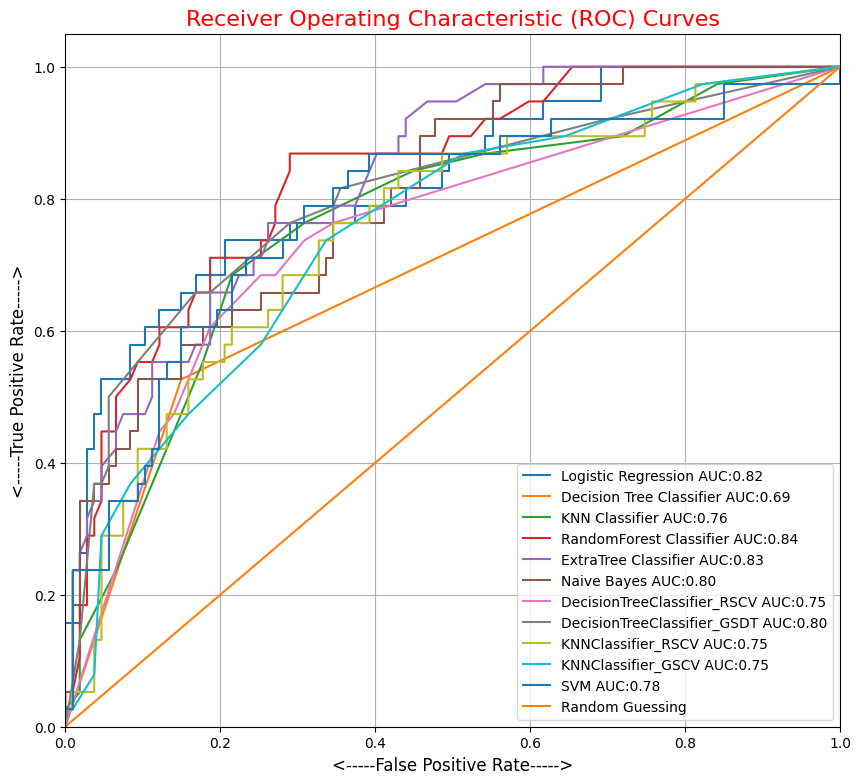

In [29]:
plt.figure(figsize=(10,9))
for model_name,model in models.items():
    print(f"Fitting model: {model_name}")
    
    if isinstance(model,(GridSearchCV,RandomizedSearchCV)):
        model.fit(Xtrain,ytrain)
        best_model = model.best_estimator_
        print(f"Best parameters for {model_name}: {model.best_params_}")
        
    else:
        best_model = model
        best_model.fit(Xtrain,ytrain)
        
    y_pred = best_model.predict(Xtest)
    y_pred_proba = best_model.predict_proba(Xtest)[:,1]
    
    fpr,tpr,_ = roc_curve(ytest,y_pred_proba)
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label= f'{model_name} AUC:{roc_auc:.2f}')
    
    print(f'Model Name:: {model_name}')
    print(f'Accuracy Score of {model_name} is {accuracy_score(ytest,y_pred)}')
    print(classification_report(ytest,y_pred))
    print('*****'*27)
    print('*****'*27)
plt.plot([0,1],[0,1],label='Random Guessing')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('<-----False Positive Rate----->',fontsize=12)
plt.ylabel('<-----True Positive Rate----->',fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curves',fontsize=16,color='red')
plt.legend(loc='best')
plt.grid(True)
plt.show()

***RandomForest Classifier performed the best with the AUC score of 0.84***

## Using Neural Network

In [30]:
transformed = CT.fit_transform(Df)
X= transformed
y=Df.Outcome
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.21,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(571, 8)
(153, 8)
(571,)
(153,)


In [31]:
import tensorflow as tf

## ANN model building

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(50,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(.13),
    tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dropout(.13),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


## ANN model training

In [33]:
model.compile(optimizer='Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'],)
M = model.fit(Xtrain,ytrain, validation_data=(Xtest,ytest), epochs=20,batch_size=15,)

Epoch 1/20
39/39 [==============================] - 2s 8ms/step - loss: 0.6753 - accuracy: 0.7180 - val_loss: 0.6052 - val_accuracy: 0.7386
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.7443 - val_loss: 0.5470 - val_accuracy: 0.7712
Epoch 3/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.7461 - val_loss: 0.5272 - val_accuracy: 0.7908
Epoch 4/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7391 - val_loss: 0.5194 - val_accuracy: 0.7974
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.7688 - val_loss: 0.5231 - val_accuracy: 0.7647
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5413 - accuracy: 0.7583 - val_loss: 0.5529 - val_accuracy: 0.7255
Epoch 7/20
39/39 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7741 - val_loss: 0.5063 - val_accuracy: 0.8105
Epoch 8/20
39/39 [==

In [34]:
print("train score", model.evaluate(Xtrain,ytrain))
print("test score", model.evaluate(Xtest, ytest))

18/18 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7881
train score [0.47370052337646484, 0.7880910634994507]
5/5 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7974
test score [0.5029560923576355, 0.7973856329917908]


## Neural Network model performance
1. Loss Curve. Training vs Validation/testing Loss.
2. Accuracy Curve. Training vs Validation/training Accuracy.
3. ROC curve.

**1. Loss Curve**

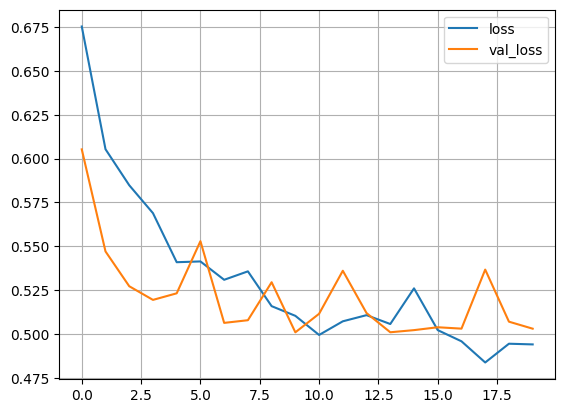

In [35]:
plt.plot(M.history['loss'], label='loss')
plt.plot(M.history['val_loss'], label='val_loss')
plt.legend()
plt.grid(True)
plt.show()

**2. Accuracy Curve**

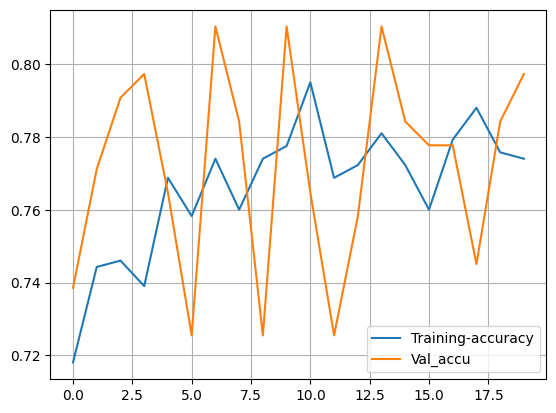

In [36]:
plt.plot(M.history['accuracy'], label='Training-accuracy')
plt.plot(M.history['val_accuracy'], label='Val_accu')
plt.legend()
plt.grid(True)
plt.show()

**3. ROC Curve**

5/5 [==============================] - 0s 2ms/step


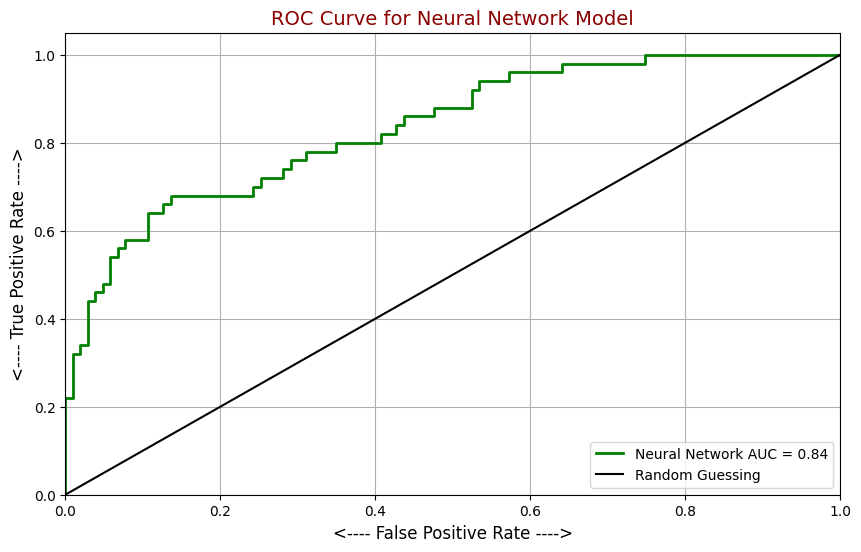

In [37]:
y_pred_proba = model.predict(Xtest).ravel()

fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Neural Network AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='black', linestyle='-', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('<---- False Positive Rate ---->', fontsize=12)
plt.ylabel('<---- True Positive Rate ---->', fontsize=12)
plt.title('ROC Curve for Neural Network Model', fontsize=14, color='darkred')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Prediction using ANN model.

In [38]:
new_data = pd.DataFrame([{
    'Pregnancies': '2',
    'Glucose': 120,
    'BloodPressure': 70,
    'SkinThickness': 20,
    'Insulin': 85,
    'BMI': 28.0,
    'DiabetesPedigreeFunction': 0.45,
    'Age': 30
}])

# Transforming the input using the already-fitted ColumnTransformer
transformed_input = CT.transform(new_data)

# Predicting the probability and class
predicted_proba = model.predict(transformed_input)[0][0]
predicted_class = int(predicted_proba >= 0.5)

print(f"Predicted Probability of Diabetes: {predicted_proba:.2f}")
print(f"Predicted Class (0 = No Diabetes, 1 = Diabetes): {predicted_class}")

1/1 [==============================] - 0s 22ms/step
Predicted Probability of Diabetes: 0.04
Predicted Class (0 = No Diabetes, 1 = Diabetes): 0


## Conclusion

The accuracy of ANN model is 0.79 with ROC score of 0.84 same as RandomForest Classifier. These two are the best performing model in this dataset. Neural Network models often outperform traditional machine learning models when trained on large volumes of data. However, in our case, where the dataset is limited, the ANN model still achieves approximately the same efficiency as the RandomForest model in predicting the target class.